<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import pearsonr
import seaborn as sns
%matplotlib inline
import statistics

Загрузить датасет по url:


In [7]:
df=pd.read_csv('world-happiness-report-2019.csv')

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [34]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

In [26]:
freedom = df.Freedom
pos_aff = df['Positive affect']

(array([16., 15., 16., 15., 15., 16., 15., 16., 15., 16.]),
 array([  1. ,  16.4,  31.8,  47.2,  62.6,  78. ,  93.4, 108.8, 124.2,
        139.6, 155. ]),
 <a list of 10 Patch objects>)

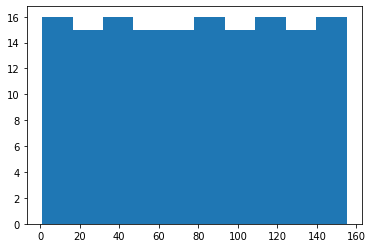

In [41]:
plt.hist(freedom)    # Равномерное распределение

(array([16., 15., 16., 15., 15., 16., 15., 16., 15., 16.]),
 array([  1. ,  16.4,  31.8,  47.2,  62.6,  78. ,  93.4, 108.8, 124.2,
        139.6, 155. ]),
 <a list of 10 Patch objects>)

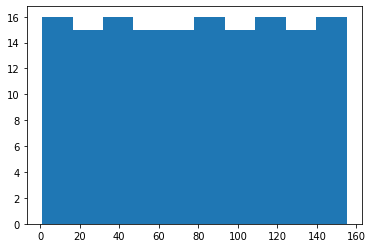

In [28]:
plt.hist(pos_aff)    # Равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [32]:
print('Описательные статистики для атрибута Freedom:')
print(f'Медиана {statistics.median(freedom)}')
print(f'Математическое ожидание {statistics.mean(freedom)}')
print(f'Стандартное отклонение {statistics.pstdev(freedom)}')
print(f'Дисперсия {statistics.pvariance(freedom)}')
print(f'Минимум {min(freedom)}')
print(f'Максимум {max(freedom)}')
print(f'Размах {max(freedom) - min(freedom)}')

Описательные статистики для атрибута Freedom:
Медиана 71.0
Математическое ожидание nan
Стандартное отклонение nan
Дисперсия nan
Минимум 1.0
Максимум 155.0
Размах 154.0


In [46]:
# Проверка на выбросы - нули

freedom.isnull().sum()

1

In [37]:
df[df.Freedom.isnull()]        # В строчке Qatar большинство значений отсутствует

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [53]:
# Убираем строчку Qatar - полупустая. Кроме того, расчет корреляции по null значениям невозможен
freedom = freedom[~freedom.isnull()]
pos_aff = pos_aff[~pos_aff.isnull()]   # у Positive Affect тоже единственное отсутствующее значение - по Qatar
df_new = df.loc[~df.Freedom.isnull(), :]

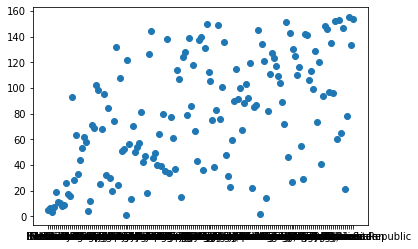

In [55]:
# Проверка на выбросы - аномально высокие/низкие значения

plt.scatter(df_new['Country (region)'], freedom)     # Судя по графику, таких выбросов нет

Почему нельзя найти моду?

In [0]:
print(f'Мода {statistics.mode(freedom)}')   
# Не работает, поскольку самых распространенных значений, встречающихся одинаковое количество раз, много; 
# логично для равномерного распределения
# Также логично, что нет математического среднего, и как следствие дисперсии и стандартного отклонения

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

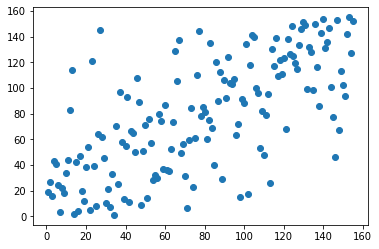

In [43]:
plt.scatter(freedom, pos_aff)    # Судя, по графику вероятна некоторая положительная корреляция 

In [57]:
corr, p_value = sts.pearsonr(freedom, pos_aff)
print(corr)       # Коэфициент 0,68 - подверждает наличие некоторой связи между. Положительный знак - связь прямая

0.6817698430601657


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [64]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

freedom_normalized = pd.DataFrame(min_max_scaler.fit_transform(np.array(freedom).reshape(-1, 1)))
freedom_normalized.head()

,0
0,0.025974
1,0.032468
2,0.012987
3,0.038961
4,0.116883


Построить матрицу корреляций для всех колонок таблицы

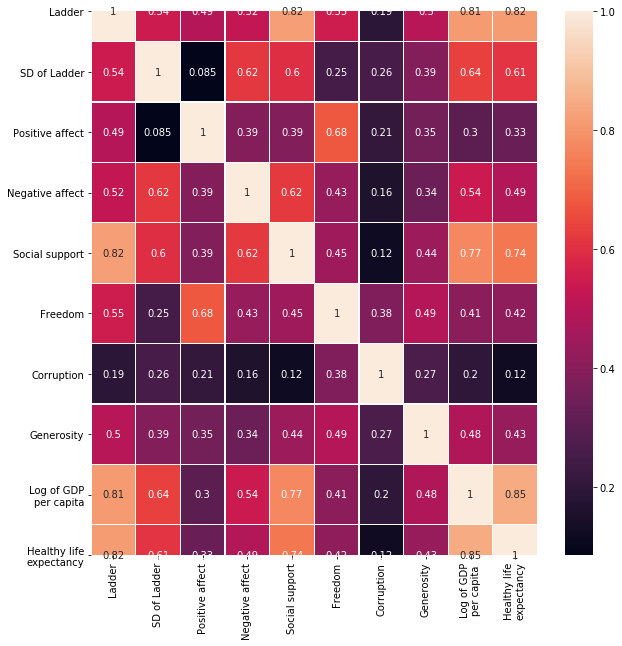

In [74]:
sns.heatmap(df_new.corr(), annot=True, linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)

Загрузить таблицу цен на авокадо: 

In [75]:
import io
import requests
df=pd.read_csv('avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

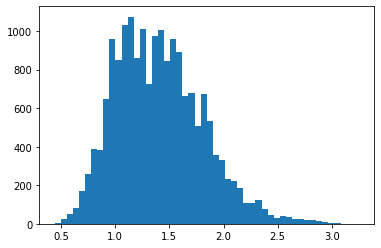

In [81]:
plt.hist(df.AveragePrice, 50)     # Похоже на нормальное распределение
plt.show()

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

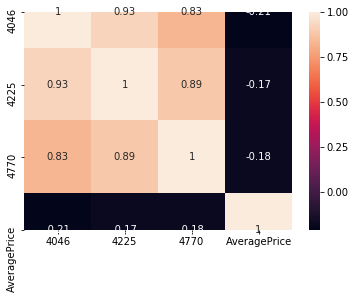

In [93]:
sns.heatmap(df[['4046','4225','4770','AveragePrice']].corr(), annot=True)  

- Корреляция значимая и прямая между продажами различных типов авокадо
- Незначительная обратная корреляция между ценой и объемом продаж по всем типам авокадо